Found 10017 validated image filenames.
Found 1252 validated image filenames.
Found 1253 validated image filenames.
Visualizing 2 preprocessed images...
Found 1 validated image filenames.
Displaying Image 1 in Real Sizes


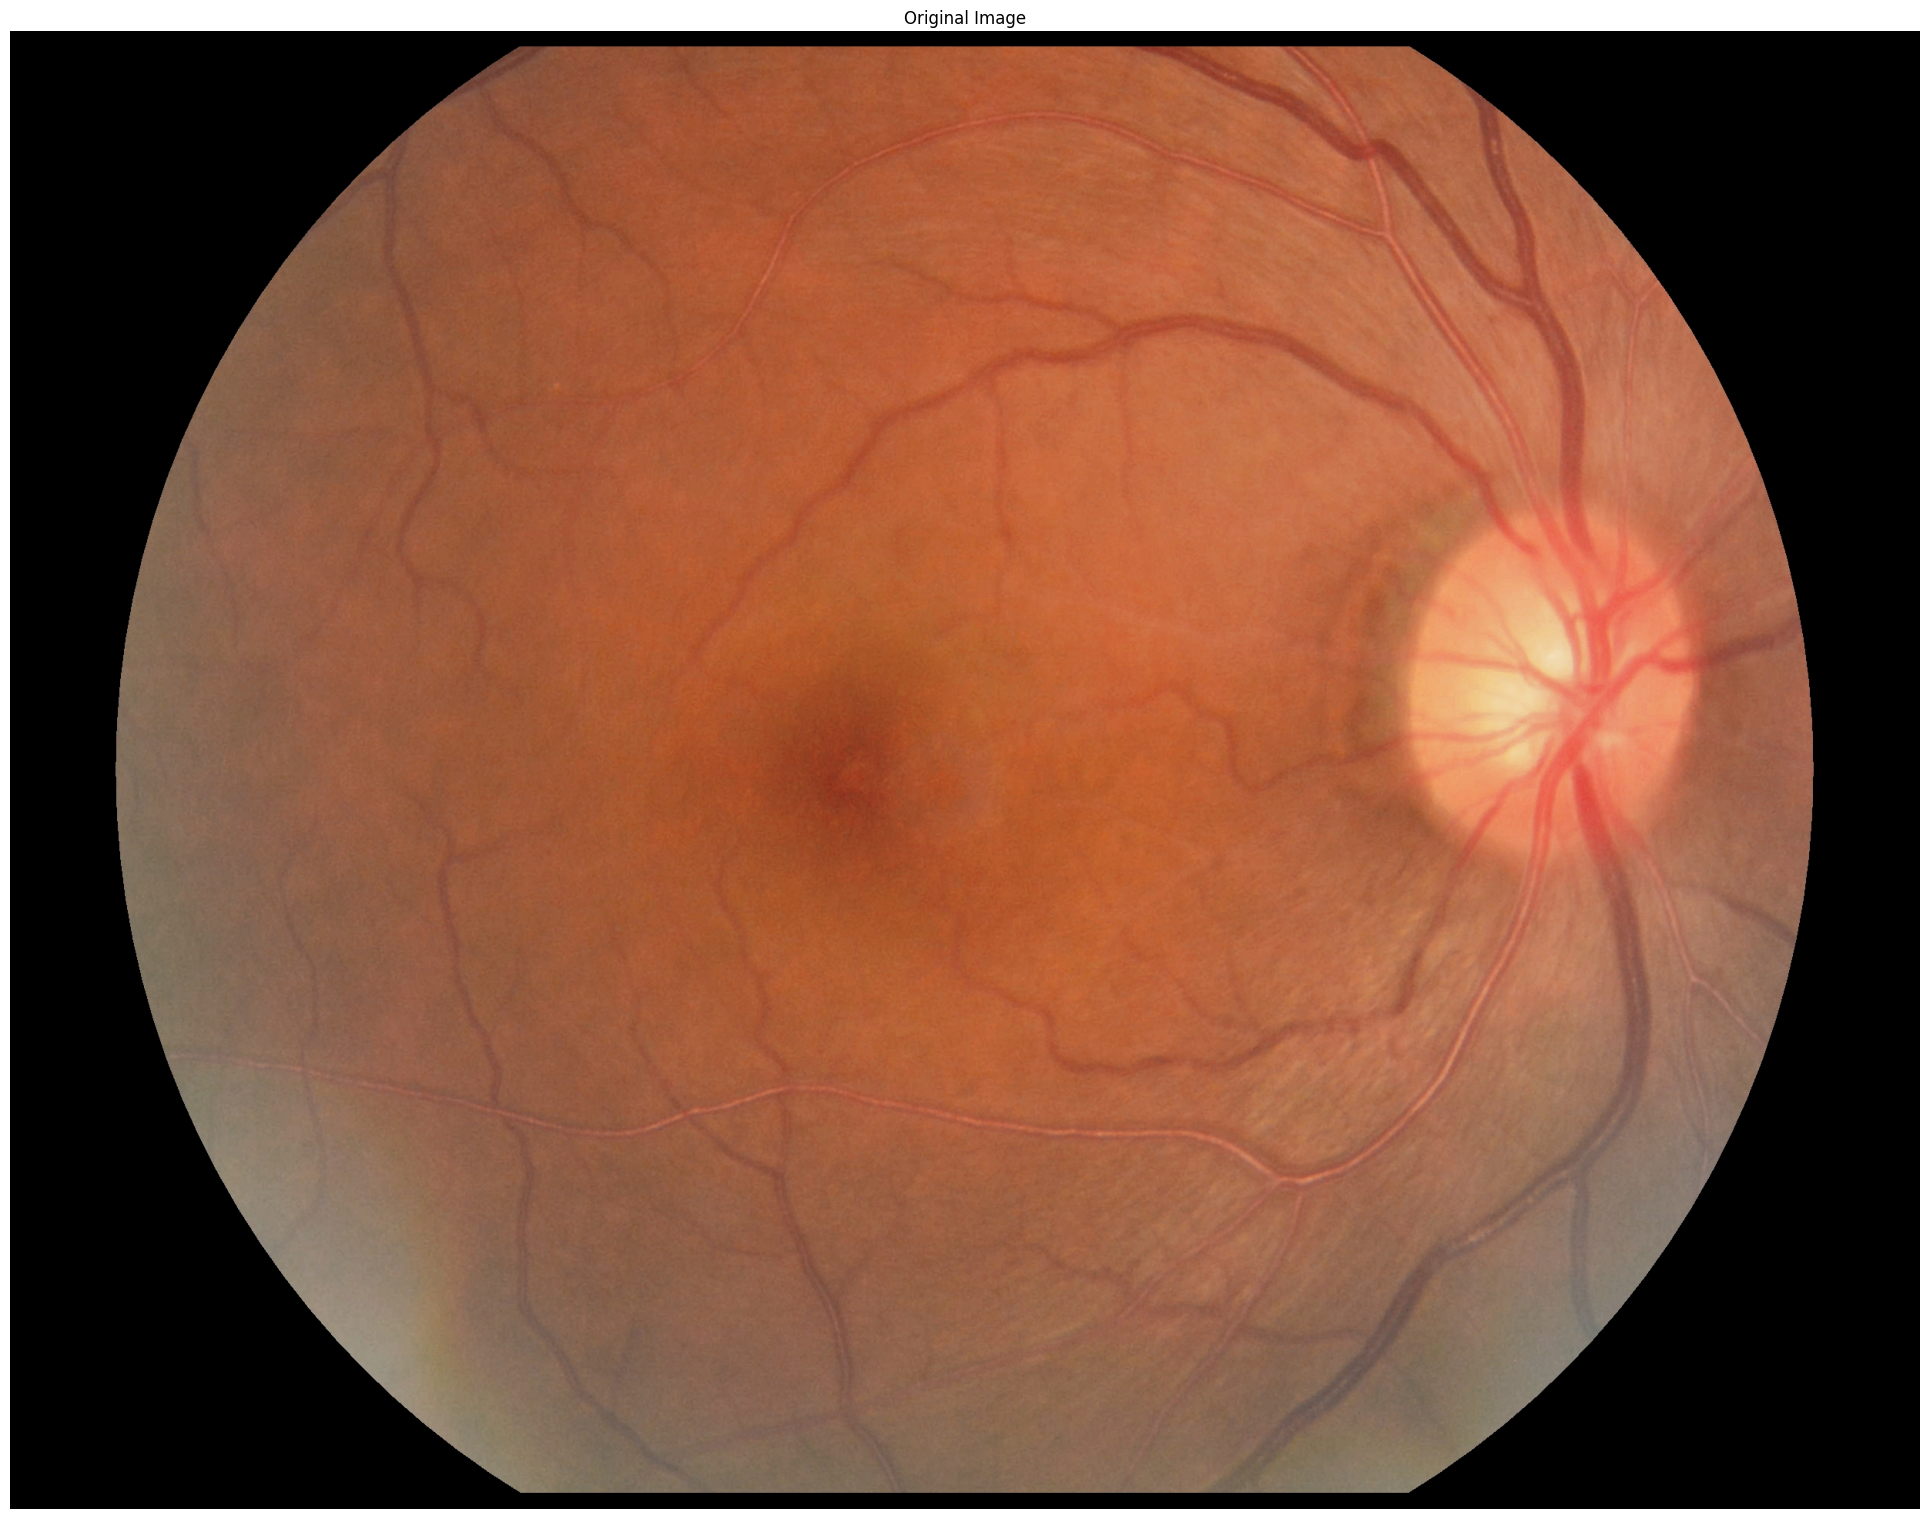

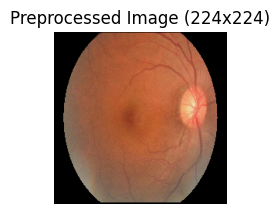

Image 1:
  - MSE: 0.0006


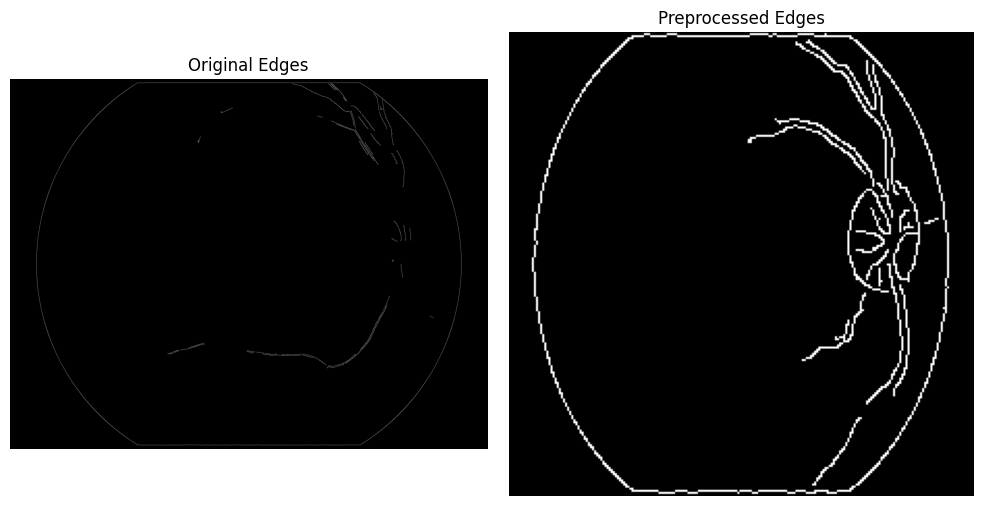

Found 1 validated image filenames.
Displaying Image 2 in Real Sizes


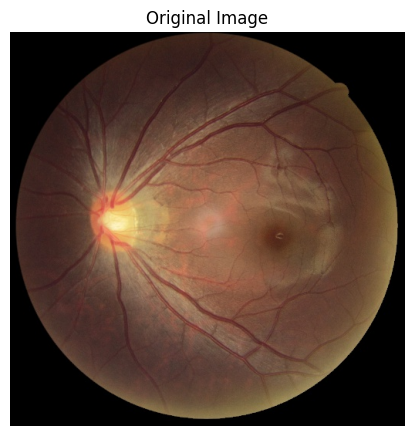

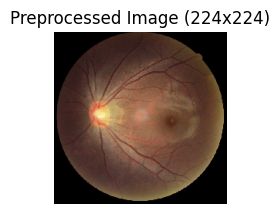

Image 2:
  - MSE: 0.0003


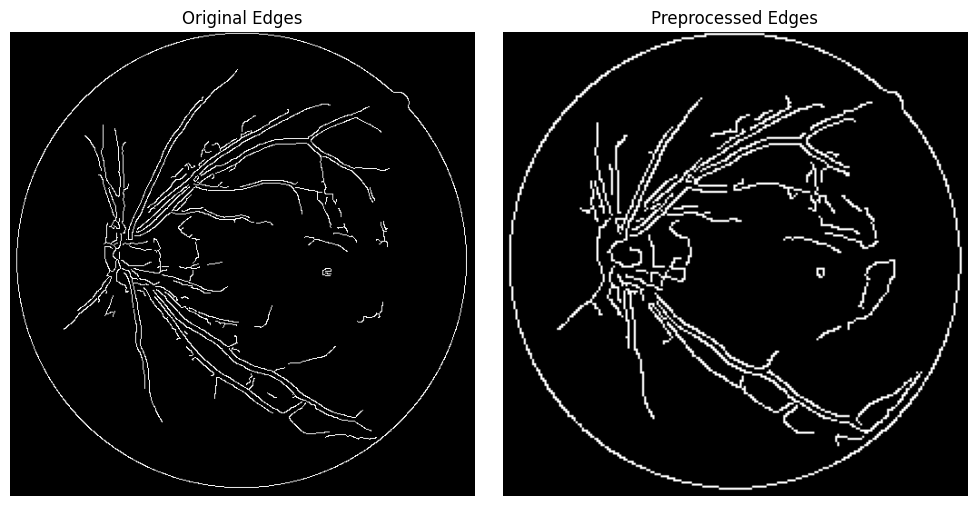

71686520/71686520 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb4 (Functional)          │ (None, 7, 7, 1792)          │      17,673,823 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1792)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         229,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,903,972 (68.30 MB)

 Trainable params: 17,778,765 (67.82 MB)

 Non-trainable params: 125,207 (489.09 KB)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1253/1253 ━━━━━━━━━━━━━━━━━━━━ 495s 294ms/step - accuracy: 0.6056 - loss: 1.0197 - val_accuracy: 0.6837 - val_loss: 1.0203
Epoch 2/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 197s 156ms/step - accuracy: 0.7063 - loss: 0.8026 - val_accuracy: 0.7252 - val_loss: 0.7920
Epoch 3/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 198s 157ms/step - accuracy: 0.7433 - loss: 0.7217 - val_accuracy: 0.7732 - val_loss: 0.6287
Epoch 4/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 197s 156ms/step - accuracy: 0.7619 - loss: 0.6779 - val_accuracy: 0.8067 - val_loss: 0.5673
Epoch 5/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 197s 156ms/step - accuracy: 0.7677 - loss: 0.6555 - val_accuracy: 0.7708 - val_loss: 0.7957
Epoch 6/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 197s 156ms/step - accuracy: 0.7797 - loss: 0.6285 - val_accuracy: 0.7748 - val_loss: 0.6466
Epoch 7/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 204s 162ms/step - accuracy: 0.7758 - loss: 0.6166 - val_accuracy: 0.8027 - val_loss: 0.5556
Epoch 8/10
1253/1253 ━━━━━━━━━━━━━━━━━━━━ 198s 157ms/step - accuracy: 0.7

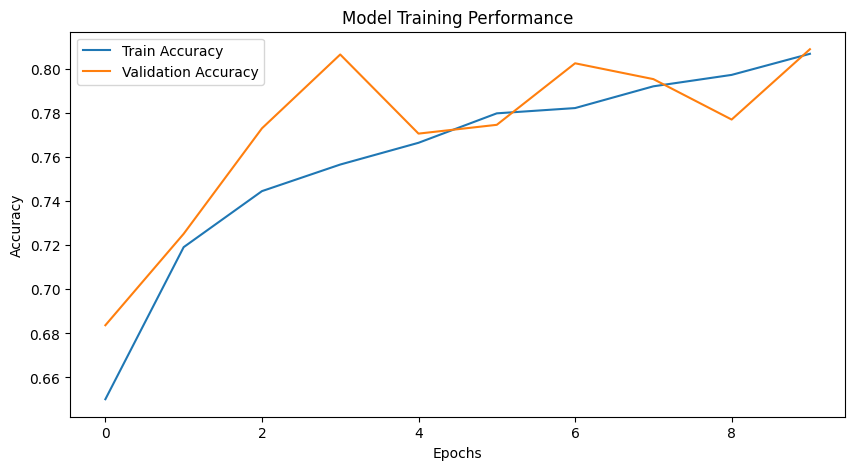

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step
Predicted Class for /kaggle/input/dataset1/DR_grading/DR_grading/DR_grading/007-0120-000.jpg: 0


In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import canny
from skimage.metrics import structural_similarity as ssim
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import time

# Step 1: Set File Paths for Kaggle
csv_path = "/kaggle/input/dataset1/DR_grading.csv"  # CSV file with image IDs & classes
image_folder ="/kaggle/input/dataset1/DR_grading/DR_grading/DR_grading" # Folder containing all images

# Step 2: Load Dataset
df = pd.read_csv(csv_path)
df['Image_Path'] = df['id_code'].apply(lambda x: os.path.join(image_folder, x))  # Map IDs to paths

# Step 3: Split Dataset into Train, Validation & Test Sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['diagnosis'])
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42, stratify=test_df['diagnosis'])

# Step 4: Preprocessing Using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df, x_col='Image_Path', y_col='diagnosis',
    target_size=(224, 224), batch_size=8, class_mode='raw', shuffle=True
)

val_generator = val_test_datagen.flow_from_dataframe(
    dataframe=val_df, x_col='Image_Path', y_col='diagnosis',
    target_size=(224, 224), batch_size=8, class_mode='raw', shuffle=False
)

test_generator = val_test_datagen.flow_from_dataframe(
    dataframe=test_df, x_col='Image_Path', y_col='diagnosis',
    target_size=(224, 224), batch_size=8, class_mode='raw', shuffle=False
)

# Step 5: Functions for MSE & SSIM Calculations
def calculate_mse(original, resized):
    return np.mean((original - resized) ** 2)



# Step 6: Display Images in Real Size
def display_real_size(image, title):
    height, width, _ = image.shape
    dpi = 100
    figsize = (width / dpi, height / dpi)
    plt.figure(figsize=figsize, dpi=dpi)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Step 7: Preprocess Image Using ImageDataGenerator
def preprocess_with_generator(image_path, target_size=(224, 224)):
    datagen = ImageDataGenerator(rescale=1.0 / 255.0)
    temp_df = pd.DataFrame({"Image_Path": [image_path], "diagnosis": [0]})
    generator = datagen.flow_from_dataframe(
        dataframe=temp_df, x_col='Image_Path', y_col=None,
        target_size=target_size, batch_size=1, class_mode=None, shuffle=False
    )
    return next(generator)[0]

# Step 8: Visualizing Preprocessing & Metrics
def visualize_preprocessing(df, n_images=2, target_size=(224, 224)):
    print(f"Visualizing {n_images} preprocessed images...")

    for i in range(min(n_images, len(df))):
        original_image_path = df.iloc[i]['Image_Path']

        if not os.path.exists(original_image_path):
            print(f"File not found: {original_image_path}")
            continue

        original_image = tf.keras.utils.load_img(original_image_path)
        original_image_array = tf.keras.utils.img_to_array(original_image)

        preprocessed_image = preprocess_with_generator(original_image_path, target_size)

        resized_back_to_original_size = cv2.resize(preprocessed_image, (original_image_array.shape[1], original_image_array.shape[0]))
        
        mse_value = calculate_mse(original_image_array / 255.0, resized_back_to_original_size)

        print(f"Displaying Image {i + 1} in Real Sizes")
        display_real_size(original_image_array.astype('uint8'), "Original Image")
        display_real_size(preprocessed_image, "Preprocessed Image (224x224)")

        print(f"Image {i+1}:")
        print(f"  - MSE: {mse_value:.4f}")

        original_edges = canny(cv2.cvtColor(original_image_array.astype('uint8'), cv2.COLOR_RGB2GRAY))
        preprocessed_edges = canny(cv2.cvtColor(preprocessed_image.astype('float32'), cv2.COLOR_RGB2GRAY))

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(original_edges, cmap='gray')
        plt.title("Original Edges")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(preprocessed_edges, cmap='gray')
        plt.title("Preprocessed Edges")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

visualize_preprocessing(df, n_images=2, target_size=(224, 224))

# Step 9: Load EfficientNetB4 Model
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # 5 classes for DR severity
])
model.build(input_shape=(None, 224,224, 3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Step 10: Train the Model and Track Time
start_time = time.time()

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    verbose=1
)

end_time = time.time()
training_time = end_time - start_time
print(f"Total Training Time: {training_time:.2f} seconds")

# Step 11: Evaluate Model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy}")

# Step 12: Save the Model
model.save("/kaggle/working/efficientnetb4_model.h5")
print("Model saved successfully!")

# Step 13: Plot Training Performance
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Model Training Performance")
plt.show()

# Step 14: Predict an Image
def predict_image(image_path):
    img = tf.keras.utils.load_img(image_path, target_size=(224, 224))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array / 255.0, 0)

    predictions = model.predict(img_array)
    predicted_class = tf.argmax(predictions[0])
    return predicted_class.numpy()

sample_image_path = os.path.join(image_folder, "007-0120-000.jpg")  
predicted_class = predict_image(sample_image_path)
print(f"Predicted Class for {sample_image_path}: {predicted_class}")


In [2]:
# Add after Step 11
metrics_df = pd.DataFrame({
    'Model': ['EfficientNetB4'],
    'Dataset': ['Dataset1'],
    'Training_Accuracy': [history.history['accuracy'][-1]],
    'Validation_Accuracy': [history.history['val_accuracy'][-1]],
    'Test_Accuracy': [test_accuracy],
    'Training_Time': [training_time]
})
metrics_df.to_csv("/kaggle/working/EfficientNetB4_Dataset1_metrics.csv", index=False)

In [3]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.7 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.2.2 which is incompatible.
pandas-gbq 0.25.0 requires google-api-core<3.0.0dev,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible.
plotnine 0.14.4 requires matplotlib>

In [4]:
import tensorflowjs as tfjs

# Convert the HDF5 model to TensorFlow.js format
tfjs.converters.save_keras_model(model, "/kaggle/working/efficientnetb4_tfjs")

failed to lookup keras version from the file,
    this is likely a weight only file
weight normalization/count with shape () and dtype int64 was auto converted to the type int32


In [5]:

# Save the model in HDF5 format (standard Keras format)
model.save("/kaggle/working/efficientnetb4_model.h5")
print("Model saved in HDF5 format")

# Install TensorFlow.js tools if not already installed
!pip install tensorflowjs


# Use tensorflowjs_converter with explicit input shapes
!tensorflowjs_converter \
    --input_format=keras \
    --output_format=tfjs_layers_model \
    --signature_name=serving_default \
    --saved_model_tags=serve \
    /kaggle/working/efficientnetb4_fixed.h5 \
    /kaggle/working/efficientnetb4_tfjs

print("Model converted to TensorFlow.js format with explicit input shape")

print("Model converted to TensorFlow.js format")

# Verify the conversion by checking file sizes
!ls -la /kaggle/working/efficientnetb4_tfjs/

Model saved in HDF5 format
2025-03-13 12:02:40.979975: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-13 12:02:41.000718: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-13 12:02:41.007063: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Traceback (most recent call last):
  File "/usr/local/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/converters/converter.py", line 959, in pip_main
    main([' '.join(sys.argv[1:])])
  File "/usr/local/lib/python3.10/dist-packages/tensorflowjs/conve